In [966]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d


In [1347]:
num = '11'
data = pd.read_hdf(num + '_DLC_3D.h5')
#remove redundant top level
data = data['DLC_3D']
#flatten data frame
data.columns = [' '.join(col).strip() for col in data.columns.values]
print(data.shape)
clean = data.copy()
data.describe()

(429, 9)


,bodypart1 x,bodypart1 y,bodypart1 z,bodypart2 x,bodypart2 y,bodypart2 z,bodypart3 x,bodypart3 y,bodypart3 z
count,338.000000,338.000000,338.000000,428.000000,428.000000,428.000000,173.000000,173.000000,173.000000
mean,6.213920,38.026864,-108.509677,4.009191,41.554988,-103.884068,-0.090647,36.843190,-117.473731
std,1.352790,5.719797,16.324703,0.967799,2.354719,5.724907,0.983006,1.212630,3.879284
min,1.711054,31.216978,-195.341758,1.730068,36.871053,-134.698063,-2.675429,32.866317,-126.052027
25%,5.541080,35.558452,-107.559762,3.309149,39.743531,-107.160440,-0.812353,36.071845,-120.019108
50%,6.318475,37.546733,-105.730554,3.875282,42.036700,-102.313192,-0.296193,36.542352,-116.741633
75%,7.065728,38.290540,-101.394852,4.705099,42.813003,-99.645073,0.804908,38.060175,-115.479685
max,8.615819,64.877879,-98.689916,7.254849,54.717914,-97.057003,2.001875,39.894395,-104.553307


In [1348]:
#interpolate using full data
data = data.interpolate(method='quadratic')

In [1349]:
#cut to just actual nose poke
poke_frame = 385
margin = 30
data = data[poke_frame-margin:poke_frame+margin]
clean = data.copy()
data.describe()

,bodypart1 x,bodypart1 y,bodypart1 z,bodypart2 x,bodypart2 y,bodypart2 z,bodypart3 x,bodypart3 y,bodypart3 z
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,6.364471,43.940228,-124.299880,4.140384,41.590303,-102.373685,-1.556499,36.164883,-112.095246
std,1.445614,13.262959,36.269486,0.788034,1.998989,3.670156,1.133858,2.302717,5.317703
min,2.089589,33.139746,-230.479506,2.530533,38.092045,-111.183131,-3.109312,32.866317,-120.864193
25%,5.789408,35.627542,-131.854785,3.633791,39.715497,-105.094270,-2.699599,34.038461,-116.196942
50%,6.222677,37.941005,-106.436206,4.235741,41.657577,-100.751986,-1.406304,36.215883,-112.449282
75%,7.469680,48.589709,-101.948260,4.808448,43.605672,-99.648963,-0.695944,37.910230,-106.877508
max,8.615819,83.051950,-98.946783,5.401686,44.696999,-97.057003,0.832099,39.908581,-104.388210


In [1358]:
#remove extreme outliers # only done if nessesary
arr = np.array(data)
cols = list(data.columns)
max_std = np.max(np.nanstd(arr, axis=0))
means = np.full(arr.shape, np.abs(np.nanmean(arr, axis=0)))
tolerance = .2 #in max std
pos_arr = np.abs(arr).copy()
ind = np.argwhere(pos_arr > tolerance*max_std+means)
arr[ind] = np.nan
clean = pd.DataFrame(arr, columns=cols)
clean.describe()

,bodypart1 x,bodypart1 y,bodypart1 z,bodypart2 x,bodypart2 y,bodypart2 z,bodypart3 x,bodypart3 y,bodypart3 z
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,6.514264,37.078001,-105.777935,4.054084,41.026543,-102.055391,-1.407458,35.463285,-111.101309
std,1.521492,4.107730,8.200447,0.771616,2.007302,3.550984,0.975232,2.079080,5.027222
min,2.089589,33.139746,-131.471181,2.530533,38.092045,-109.501501,-3.062396,32.866317,-119.173011
25%,5.963162,34.121548,-106.448379,3.608625,39.027283,-105.098827,-2.273689,33.258033,-115.417250
50%,6.594418,36.840706,-103.017749,4.224162,40.833965,-100.618465,-1.047073,36.134364,-111.776009
75%,7.559497,37.941005,-101.239444,4.617814,42.747211,-99.415464,-0.718185,36.503761,-105.648025
max,8.615819,50.261371,-98.946783,5.252055,44.434032,-97.057003,0.541389,39.908581,-104.388210


In [1359]:
#interp = interp.interpolate(method='linear', limit_direction='backward', limit=25, fill='outside')'
interp = clean.interpolate(method='quadratic').rolling(3, win_type='gaussian', min_periods=1).mean(std=2).interpolate(method='quadratic')
interp.dropna(inplace=True)
print(clean)
interp.describe()


    bodypart1 x  bodypart1 y  bodypart1 z  bodypart2 x  bodypart2 y  \
0      7.790965    37.129832  -105.465521     4.592265    41.626980   
1           NaN          NaN          NaN          NaN          NaN   
2           NaN          NaN          NaN          NaN          NaN   
3      8.615819    36.911647  -105.313156     5.252055    42.087084   
4      8.457207    36.923442  -105.669191     5.107371    42.177754   
5           NaN          NaN          NaN          NaN          NaN   
6      7.421246    35.981168  -102.529933     4.380223    40.931503   
7      6.916906    35.270569  -101.555066     3.987377    40.263777   
8           NaN          NaN          NaN          NaN          NaN   
9      6.252536    34.510370  -101.479305     3.179768    39.292875   
10     6.083177    34.443153  -101.878987     2.809463    39.208406   
11     5.988450    34.194803  -101.253237     2.798600    38.928189   
12     5.854592    34.014415  -100.744023     2.659782    38.692568   
13    

,bodypart1 x,bodypart1 y,bodypart1 z,bodypart2 x,bodypart2 y,bodypart2 z,bodypart3 x,bodypart3 y,bodypart3 z
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,5.976148,38.908049,-109.748610,4.288757,41.458305,-101.771177,-1.530697,36.146774,-112.095748
std,1.725576,8.001580,20.126747,0.799009,1.861239,3.508840,1.155476,2.292593,5.258961
min,1.712752,27.018686,-167.295400,2.662836,38.374041,-109.862929,-3.104554,32.878550,-121.008520
25%,4.932301,34.343129,-107.863786,3.771841,39.804960,-104.957407,-2.685689,34.047751,-116.078853
50%,6.001572,36.925506,-105.109644,4.398266,41.616058,-100.172954,-1.403505,36.200237,-112.813772
75%,7.244736,39.009298,-101.324932,4.940476,42.921990,-99.102778,-0.654021,37.837694,-106.899561
max,8.544622,60.550801,-73.102526,5.601203,44.467904,-98.007207,0.740585,39.888896,-104.414588


In [1360]:
centroid_x = np.array(interp[['bodypart1 x', 'bodypart2 x', 'bodypart3 x']].mean(axis=1))
centroid_y = np.array(interp[['bodypart1 y', 'bodypart2 y', 'bodypart3 y']].mean(axis=1))
centroid_z = np.array(interp[['bodypart1 z', 'bodypart2 z', 'bodypart3 z']].mean(axis=1))


In [1361]:
#center data relative to start of trial
centroid_x = centroid_x - centroid_x[0]
centroid_y = centroid_y - centroid_y[0]
centroid_z = centroid_z - centroid_z[0]

Text(0.5, 0, 'Z')

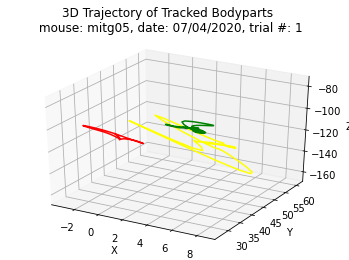

In [1362]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(np.array(interp['bodypart1 x']), np.array(interp['bodypart1 y']), np.array(interp['bodypart1 z']), 'yellow')
ax.plot3D(np.array(interp['bodypart3 x']), np.array(interp['bodypart3 y']), np.array(interp['bodypart3 z']), 'red')
ax.plot3D(np.array(interp['bodypart2 x']), np.array(interp['bodypart2 y']), np.array(interp['bodypart2 z']), 'green')
fig.suptitle('3D Trajectory of Tracked Bodyparts \n mouse: mitg05, date: 07/04/2020, trial #: 1')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.set_xlim(-5, 5)
# ax.set_ylim(36, 46)
# ax.set_zlim(-115, -105)

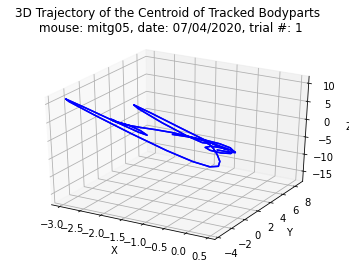

In [1363]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(centroid_x, centroid_y, centroid_z, 'blue')
fig.suptitle('3D Trajectory of the Centroid of Tracked Bodyparts \n mouse: mitg05, date: 07/04/2020, trial #: 1')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot3D(centroid_x, centroid_y, centroid_z, 'blue')

<p>Above plot is oriented such that the nose poke plate is at ~(3.5, 37, -109) </p>

In [1364]:
#save figure as vector
fig.savefig('centroid_traj'+ num +'.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<h2> Calculating Yaw, Pitch, Roll</h1>
<h3> First Frame With No NaN Treated as 0,0,0 </h2>

In [1365]:
#extract to numpy vectors 
b1 = np.array(interp[['bodypart1 x', 'bodypart1 y', 'bodypart1 z']])
b2 = np.array(interp[['bodypart2 x', 'bodypart2 y', 'bodypart2 z']])
b3 = np.array(interp[['bodypart3 x', 'bodypart3 y', 'bodypart3 z']])

pd.DataFrame(np.concatenate([b1, b2, b3], axis=1)).head()

,0,1,2,3,4,5,6,7,8
0,7.790965,37.129832,-105.465521,4.592265,41.626980,-104.983940,-0.511512,36.080921,-115.124325
1,8.018537,37.061991,-105.279115,4.780984,41.694000,-104.957139,-0.498961,36.084473,-115.235866
2,8.209227,37.008092,-105.178591,4.936539,41.773264,-104.958209,-0.502150,36.027194,-115.126073
3,8.484178,36.935364,-105.127803,5.156469,41.926632,-104.999543,-0.529928,35.842697,-114.624003
4,8.544622,36.915648,-105.332300,5.193973,42.063752,-105.057492,-0.610665,35.477699,-113.426604


In [1366]:
#calculate triangle vecs and normal
vec1 = b1-b2
vec2 = b1-b3
raw_norms = np.cross(vec1, vec2)
norms = raw_norms / np.linalg.norm(raw_norms, axis=1).reshape(-1, 1)
vec1 = vec1 / np.linalg.norm(vec1, axis=1).reshape(-1, 1)
orig_norms = np.full(norms.shape, norms[0])
orig_v1 = np.full(vec1.shape, vec1[0])

In [1367]:
# calculate orthogonal reference vec.
#defining as orthogonal to normal vec and b1-b2 because b3 (nose) is less stable / higher error point. 
ref = np.cross(norms, vec1)
ref = ref / np.linalg.norm(ref, axis=1).reshape(-1, 1)
orig_ref = np.full(ref.shape, ref[0])


In [1368]:
def calculate_angle(cur_vec, orig_vec, orig_axis):
    #project cur vec unto axis
    scale_proj = (np.sum(cur_vec*orig_axis, axis=1) / np.sum(orig_axis*orig_axis, axis=1))
    #print(scale_proj)
    orth_proj = (orig_axis.T * scale_proj).T
    #print(orth_proj)
    proj = cur_vec - orth_proj

    #calculate angle from orig vec
    an_dots = np.sum(proj*orig_vec, axis=1)
    #print(an_dots)
    angle = np.arccos(an_dots)
    #print(angle)
    neg = np.ones(angle.shape)
    
    #determine direction 
    check_c = np.cross(proj, orig_vec)
    #print(check_c)
    check = np.sum(check_c*orig_axis, axis=1)
    #print(check)
    inds = np.argwhere(check < 0)
    neg[inds] = -1
    angle = angle * neg
    return angle

In [1369]:
#remove directional artifacts
def remove_artifacts(angles):
    tol = 1*np.nanstd(angles)
    for i in range(1, len(angles)):
        a = angles[i]
        p = angles[i-1]
        if np.isclose(-1*a, p, rtol=tol) and np.abs(a) > .05 and np.abs(p) > .05:
            angles[i] = p
    return angles

In [1370]:
#calculate pitch
pitch = calculate_angle(norms, orig_norms, orig_v1)
nans = np.argwhere(np.isnan(pitch))
pitch[nans] = 0
pitch = np.array(pitch)
pitch[np.argwhere(np.isnan(pitch))] = 0
pitch = remove_artifacts(pitch)
pitch = pd.DataFrame(pitch).rolling(3, win_type='gaussian').mean(std=2)
pitch.describe()

,0
count,58.000000
mean,0.865728
std,0.707147
min,-0.168438
25%,0.233916
50%,0.742598
75%,1.737666
max,1.784462


In [1371]:
#calculate roll by comparing cur_normal projected onto plane fromed by orig_ref and b1-b2 to orig_normal
roll = calculate_angle(vec1, orig_v1, orig_ref)
nans = np.argwhere(np.isnan(roll))
roll[nans] = 0
roll = remove_artifacts(roll)
roll = pd.DataFrame(roll).rolling(3, win_type='gaussian').mean(std=2)
pd.DataFrame(roll).describe()

,0
count,58.000000
mean,-0.926974
std,0.722203
min,-1.698313
25%,-1.573407
50%,-1.186150
75%,-0.200298
max,0.114804


In [1372]:
#calculate yaw by comparing ref projected onto plane defined by orig_norm,  and orig_ref 
yaw = calculate_angle(ref, orig_ref, orig_norms)
yaw[np.argwhere(np.isnan(yaw))] = 0
yaw = remove_artifacts(yaw)
yaw = pd.DataFrame(yaw).rolling(3, win_type='gaussian').mean(std=2)
pd.DataFrame(yaw).describe()


<ipython-input-1368-7e22dfd9c131>:12: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(an_dots)


,0
count,58.000000
mean,0.521123
std,0.505287
min,-0.228691
25%,0.119718
50%,0.355005
75%,0.919777
max,1.258826


Text(0.5, 0, 'Frame Number')

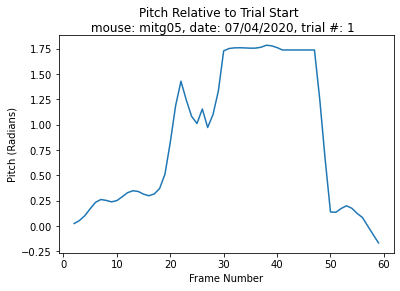

In [1373]:
fig = plt.figure()
plt.plot(range(len(pitch)), pitch)
fig.suptitle('Pitch Relative to Trial Start \n mouse: mitg05, date: 07/04/2020, trial #: 1')
plt.ylabel('Pitch (Radians)')
plt.xlabel('Frame Number')

In [1374]:
# save vector of pitch plot
fig.savefig('pitch_plot' + num + '.eps', format='eps')

Text(0.5, 0, 'Frame Number')

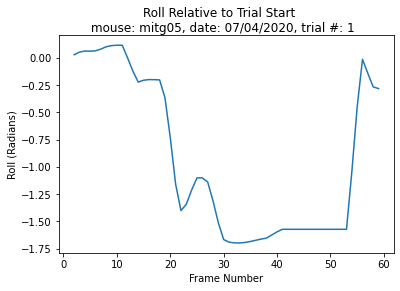

In [1375]:
fig = plt.figure()
plt.plot(range(len(roll)), roll)
fig.suptitle('Roll Relative to Trial Start \n mouse: mitg05, date: 07/04/2020, trial #: 1')
plt.ylabel('Roll (Radians)')
plt.xlabel('Frame Number')

In [1376]:
# save vector of roll plot
fig.savefig('roll_plot' + num + '.eps', format='eps')

Text(0.5, 0, 'Frame Number')

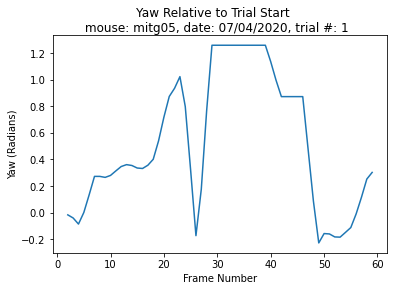

In [1377]:
fig = plt.figure()
plt.plot(range(len(yaw)), yaw)
fig.suptitle('Yaw Relative to Trial Start \n mouse: mitg05, date: 07/04/2020, trial #: 1')
plt.ylabel('Yaw (Radians)')
plt.xlabel('Frame Number')

In [1378]:
# save vector of yaw plot
fig.savefig('yaw_plot' + num +'.eps', format='eps')

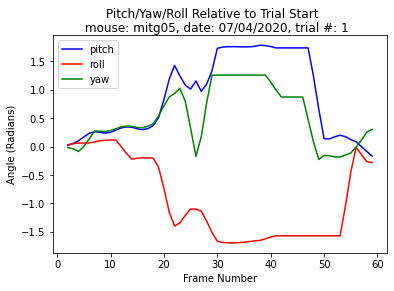

In [1379]:
#all three
fig = plt.figure()
plt.plot(range(len(pitch)), pitch, "-b", label="pitch")
plt.plot(range(len(roll)), roll, "-r", label="roll")
plt.plot(range(len(yaw)), yaw, "-g", label="yaw")
fig.suptitle('Pitch/Yaw/Roll Relative to Trial Start \n mouse: mitg05, date: 07/04/2020, trial #: 1')
plt.ylabel('Angle (Radians)')
plt.xlabel('Frame Number')
plt.legend(loc="upper left")

In [1380]:
# save vector of all angles plot
fig.savefig('all_angles'+ num +'.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<h2> 3D Error Over Trial </h2>

In [1381]:
#load 2D data
c1 = pd.read_csv('camera-1-1.csv')
c2 = pd.read_csv('camera-2-1.csv')
c1.describe()

,coords,bodypart1 x,bodypart1 y,bodypart1 likelihood,bodypart2 x,bodypart2 y,bodypart2 likelihood,bodypart3 x,bodypart3 y,bodypart3 likelihood
count,49.00000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,24.00000,380.066926,325.583002,0.979953,503.154994,335.369444,0.993995,420.229507,135.743430,0.742970
std,14.28869,15.581970,25.172584,0.140189,7.583823,20.520309,0.027792,37.506036,68.163076,0.399893
min,0.00000,355.016785,261.004730,0.018660,488.962372,302.793457,0.809310,388.385529,71.434357,0.000288
25%,12.00000,361.816498,302.884583,0.999984,497.621094,326.099731,0.999491,390.826477,77.316887,0.290010
50%,24.00000,384.229462,326.847931,0.999997,504.621735,332.591125,0.999980,397.714386,132.592178,0.999972
75%,36.00000,392.427582,342.320618,0.999999,507.773865,340.733093,0.999992,447.865326,133.403259,0.999994
max,48.00000,399.899902,377.274963,1.000000,519.581238,379.685699,0.999998,522.814331,364.476593,1.000000


<p> I'll continue trying to create a meaningful error histogram, but it's further compicated by the fact that I used a local gradient based interpolation method to fill missing data for the previous plots. The error from that is ambiguous. I could us linear interpolation instead which would itself report error as log liklihood, but the results of that are pretty clearly wrong. </p>